In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [5]:
# Matrix of eigenvectors and its inverse
P = np.array([[-1,1],[1,1]])
Pinv = la.inv(P)
# Matrix of eigenvalues
D = np.array([[1.1,0],[0,0.9]])
# Matrix with eigne vectors P and values in D
A = P@D@Pinv
print(A)

[[ 1.  -0.1]
 [-0.1  1. ]]


In [10]:
# Command for finding eigenvectors and values if we didn't already know them
eigenvals,eigenvecs = la.eig(A)
print(eigenvals)
print(eigenvecs)
# Note that the eigenvectors have been normalized

[1.1 0.9]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [26]:
# Array of 360 angles, in radians.
T = np.linspace(0,2*np.pi,360)
# Points on a unit circle corresponding to the angles in T
Circle = np.array([[np.cos(t),np.sin(t)] for t in T])
Circle.shape

(360, 2)

In [50]:
# Calculate the effect of repeatedly applying A to the Circle
# The results are saved as a list of images represented by coordinates
Images = []
Image = Circle
for i in range(24):
    Images += [Image]
    Image = Image @ A

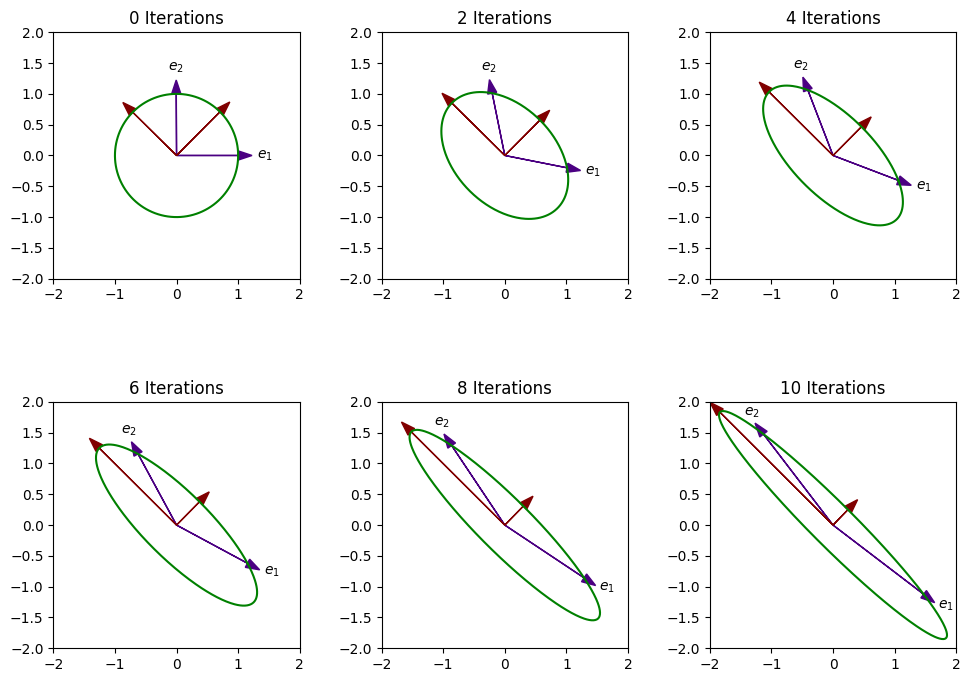

In [132]:
X = np.linspace(-3,3,100)
fig,ax=plt.subplots(ncols=3, nrows=2,figsize=(12,8))
plt.setp(ax,aspect=1,ylim=(-2,2),xlim=(-2,2))
plt.subplots_adjust(hspace=0.5)
for i in range(6):
    col = i%3
    row = i//3
    
    # The Main diagonals and the image of the circle
    # ax[row,col].plot(X,X,"r",-X,X,"b")
    ax[row,col].plot(Images[2*i][:,0],Images[2*i][:,1],"g")

    # Images of elementray basis vectors
    # Coordinates of the images
    e1 = np.array([Images[2*i][0,0],Images[2*i][0,1]])
    e2 = np.array([Images[2*i][90,0],Images[2*i][90,1]])
    # Coordinates for the annotations
    a1 = e1*(1+0.3/la.norm(e1))
    a2 = e2*(1+0.3/la.norm(e2))
    ax[row,col].arrow(0,0,e1[0],e1[1],color="indigo",head_width=0.15)
    ax[row,col].annotate("$e_1$",(a1[0],a1[1]),va="center",ha="left")
    ax[row,col].arrow(0,0,e2[0],e2[1],color="indigo",head_width=0.15)
    ax[row,col].annotate("$e_2$",(a2[0],a2[1]),va="bottom",ha="center")

    # Images of eigenvectors
    ax[row,col].arrow(0,0,Images[2*i][45,0],Images[2*i][45,1],color="maroon",head_width=0.15)
    ax[row,col].arrow(0,0,Images[2*i][135,0],Images[2*i][135,1],color="maroon",head_width=0.15)

    # Add a title
    ax[row,col].set_title(str(2*i)+" Iterations")

In [133]:
fig.savefig("eigenPlots.png")